/var/folders/m0/03b77j_d7sjfpt0w5ck4cqww0000gq/T/ipykernel_56937/2389583987.py:177: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


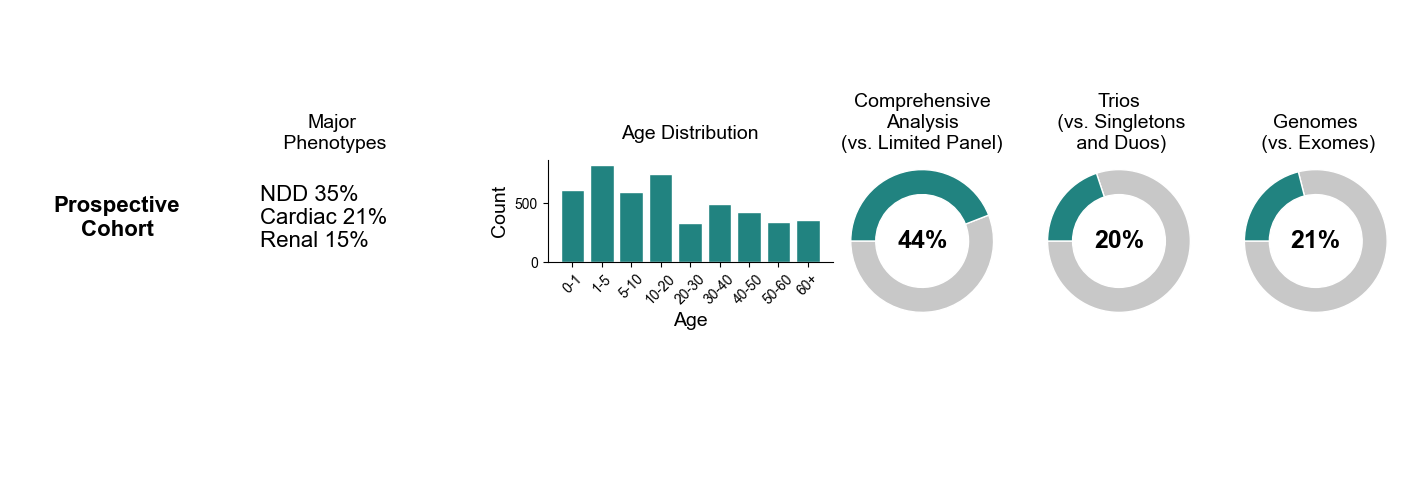

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.patches import Circle

# Set the default font to Arial
plt.rcParams['font.family'] = 'Arial'

#Load data
data = pd.read_csv('../../Data/Fig4/Fig4_panel1.csv', header=0, index_col=0)
age_data = pd.read_csv('../../Data/Fig4/Fig4_panel1_AG_VCGS_age_breakdown.csv', header=0, index_col=0)

#main_color = '#016FB9' # Azul
#main_color = '#353531' # Black Olive
main_color = '#218380' # Black Olive lighter variation

# Manual Solves
x1 = int(data['Total_solves'][0])
t1 = int(data['Cohort_size'][0])
y1 = t1-x1
sizes1 = [y1, x1]
text1 = r'$\frac{{{}}}{{{}}}$'.format(x1, t1)
labels1 = ['', '']
col1 = ['#C8C8C8', main_color]

# Comprehensive
x4 = int(data['Comprehensive'][0])
t4 = int(data['Cohort_size'][0])
y4 = t4-x4
sizes4 = [y4, x4]
text4 = "{:.0%}".format(x4 / t4)
labels4 = ['', '']
col5 = ['#C8C8C8', main_color]

# Trios vs. Singletons
x5 = int(data['Trios'][0])
t5 = int(data['Cohort_size'][0])
y5 = t5-x5
sizes5 = [y5, x5]
text5 = "{:.0%}".format(x5 / t5)
labels5 = ['', '']
col5 = ['#C8C8C8', main_color]

# Genomes vs. Exomes
x6 = int(data['Genomes'][0])
t6 = int(data['Cohort_size'][0])
y6 = t6-x6
sizes6 = [y6, x6]
text6 = "{:.0%}".format(x6 / t6)
labels6 = ['', '']
col6 = ['#C8C8C8', main_color]

# Major Phenotypes data
Ap3 = int(data['Phen1_num'][0])
Bp3 = int(data['Phen2_num'][0])
Cp3 = int(data['Phen3_num'][0])
Totalp3 = int(data['Cohort_size'][0])

# Novel Solves data
countp2 = 7
Total = 200

# Age data
combined_bins = {
    '0-1': age_data[(age_data['Max'] <= 1)]['Count'].sum(),
    '1-5': age_data[(age_data['Max'] > 1) & (age_data['Max'] <= 5)]['Count'].sum(),
    '5-10': age_data[(age_data['Max'] > 5) & (age_data['Max'] <= 10)]['Count'].sum(),
    '10-20': age_data[(age_data['Max'] > 10) & (age_data['Max'] <= 20)]['Count'].sum(),
    '20-30': age_data[(age_data['Max'] > 20) & (age_data['Max'] <= 30)]['Count'].sum(),
    '30-40': age_data[(age_data['Max'] > 30) & (age_data['Max'] <= 40)]['Count'].sum(),
    '40-50': age_data[(age_data['Max'] > 40) & (age_data['Max'] <= 50)]['Count'].sum(),
    '50-60': age_data[(age_data['Max'] > 50) & (age_data['Max'] <= 60)]['Count'].sum(),
    '60+': age_data[age_data['Max'] > 60]['Count'].sum()
}
combined_data = pd.DataFrame(list(combined_bins.items()), columns=['Age Group', 'Count'])
ages = combined_data['Count']
bin_labels = combined_data['Age Group']
#age_categories = pd.cut(ages, bins=bin_edges, right=False)

# Create figure and gridspec layout
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(1, 7, width_ratios=[1.2, 1, 0, 2, 1, 1, 1], wspace=0.1, hspace=-0.4)

# New first panel: Text only
ax0 = fig.add_subplot(gs[0, 0])
ax0.axis('off')  # Turn off the axis
ax0.text(0.5, 0.55, 'Prospective\nCohort', ha='center', va='center', fontsize=16, fontname='Arial', fontweight='bold')
#ax0.text(0.5, 0.40, 'ACG', ha='center', va='center', fontsize=24, fontname='Arial', fontweight='bold', color='#EC4E20')

# Second panel: Major Phenotypes
ax1 = fig.add_subplot(gs[0, 1])
ax1.axis('off')  # Turn off the axis
phen1 = data['Major_Phen1'][0]
phen2 = data['Major_Phen2'][0]
phen3 = data['Major_Phen3'][0]
text2 = f'{phen1} {Ap3/Totalp3:.0%}\n{phen2} {Bp3/Totalp3:.0%}\n{phen3} {Cp3/Totalp3:.0%}'
ax1.text(0.1, 0.55, text2, ha='left', va='center', fontsize=16, fontname='Arial')

# # Third panel: Histogram
# ax2 = fig.add_subplot(gs[0, 2])
# #age_counts = age_categories.value_counts().sort_index()
# ax2.bar(bin_labels, ages, edgecolor='white', color=col5[1])
# ax2.set_xlabel('Year', fontsize=14, fontname='Arial') # Relying on identical label in row below
# ax2.set_ylabel('Count', fontsize=14, fontname='Arial')
# ax2.set_xticks(range(len(bin_labels)))
# ax2.set_xticklabels(bin_labels, rotation=45)
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)


# Fourth panel: Histogram
ax3 = fig.add_subplot(gs[0, 3])
#age_counts = age_categories.value_counts().sort_index()
ax3.bar(bin_labels[:18], ages[:18], edgecolor='white', color=col5[1])
ax3.set_xlabel('Age', fontsize=14, fontname='Arial') # Relying on identical label in row below
ax3.set_ylabel('Count', fontsize=14, fontname='Arial')
ax3.set_xticks(range(len(bin_labels[:18])))
ax3.set_xticklabels(bin_labels[:18], rotation=45)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Adjust the bounding box of the histograms
# pos = ax2.get_position()
# pos_new = [pos.x0 + 0.05, pos.y0 + 0.35, pos.width - 0.04, pos.height - 0.6]
# ax2.set_position(pos_new)

pos = ax3.get_position()
pos_new = [pos.x0 + 0.05, pos.y0 + 0.35, pos.width - 0.04, pos.height - 0.6]
ax3.set_position(pos_new)

# Fifth panel: Pie chart
ax4 = fig.add_subplot(gs[0, 4])
ax4.axis('equal')
width = 0.35
kwargs = dict(colors=col5, startangle=180)
outside, _ = ax4.pie(sizes4, radius=1, pctdistance=1 - width / 2, labels=labels4, **kwargs)
plt.setp(outside, width=width, edgecolor='white')
kwargs = dict(size=18, fontweight='bold', va='center', fontname='Arial')
ax4.text(0, 0, text4, ha='center', **kwargs)

# Sixth panel: Pie chart
ax5 = fig.add_subplot(gs[0, 5])
ax5.axis('equal')
width = 0.35
kwargs = dict(colors=col5, startangle=180)
outside, _ = ax5.pie(sizes5, radius=1, pctdistance=1 - width / 2, labels=labels5, **kwargs)
plt.setp(outside, width=width, edgecolor='white')
kwargs = dict(size=18, fontweight='bold', va='center', fontname='Arial')
ax5.text(0, 0, text5, ha='center', **kwargs)

# Seventh panel: Pie chart
ax6 = fig.add_subplot(gs[0, 6])
ax6.axis('equal')
width = 0.35
kwargs = dict(colors=col6, startangle=180)
outside, _ = ax6.pie(sizes6, radius=1, pctdistance=1 - width / 2, labels=labels6, **kwargs)
plt.setp(outside, width=width, edgecolor='white')
kwargs = dict(size=18, fontweight='bold', va='center', fontname='Arial')
ax6.text(0, 0, text6, ha='center', **kwargs)

# Add titles
# Why do these have this strange "y" value? See this github issue for more info:
# https://github.com/matplotlib/matplotlib/issues/16805#issuecomment-600277360
# Hopefully at some point an update will fix this

ax0.set_title('', fontsize=14, fontname='Arial', pad=-30, y=1.000001)
ax1.set_title('Major\n Phenotypes', fontsize=14, fontname='Arial', pad=-100, y=1.000001)
# ax2.set_title('Year Recruited', fontsize=14, fontname='Arial', pad=15, y=1.000001)
ax3.set_title('Age Distribution', fontsize=14, fontname='Arial', pad=15, y=1.000001)
ax4.set_title('Comprehensive\nAnalysis\n(vs. Limited Panel)', fontsize=14, pad=-100, y=1.000001)
ax5.set_title('Trios\n (vs. Singletons\n and Duos)', fontsize=14, fontname='Arial', pad=-100, y=1.000001)
ax6.set_title('Genomes\n (vs. Exomes)', fontsize=14, fontname='Arial', pad=-100, y=1.000001)


# Adjust layout
plt.tight_layout()

fig.savefig('../../Figures/Fig4/Fig4_panel1.png')